# 初始化环境

In [23]:
from IPython.display import display, Math
from sympy import *
init_printing()

# 绘图
## 一元函数
### 基本的绘图

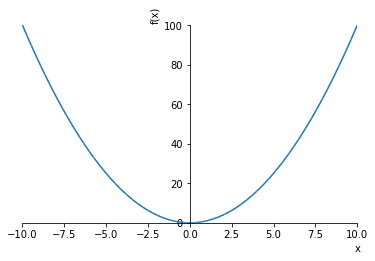

In [24]:
from sympy import symbols
from sympy.plotting import plot
x = symbols('x')

expr = x*x

plot(expr)

## 关闭字符串显示

如果不希望看到上面的'<sympy.plotting.plot.Plot at 0x7f6d26fb8780>'字符串, 在```plot()```函数的结尾添加';'

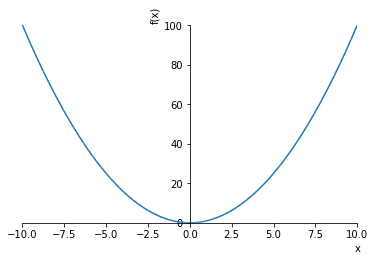

In [25]:
plot(expr);

### 指定范围的作图

如果要指定作图范围, 传入```(变量, 下限, 上限)```形式的tuple。

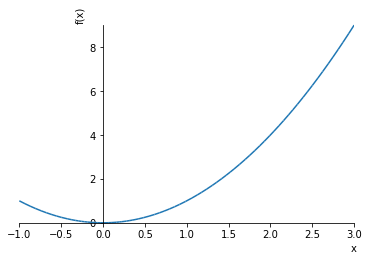

In [26]:
from sympy import symbols
from sympy.plotting import plot
x = symbols('x')

expr = x**2
expr_range = (x,-1,3)

plot(expr, expr_range);

### 标题和标签

通过关键词参数```Title```,```xlabel```,```ylabel```指定。 可以使用latex语法。

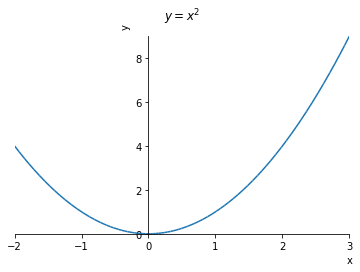

In [27]:
from sympy import symbols
from sympy.plotting import plot
x = symbols('x')

expr = x**2
expr_range = (x,-2,3)

title = '$y = {}$'.format(latex(expr))

plot(expr, expr_range, title = title, xlabel = 'x', ylabel = 'y');

### 指定线的颜色。

用关键词参数```line_color```指定颜色。

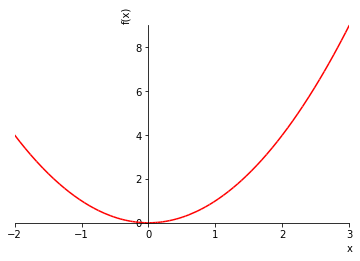

In [28]:
from sympy import symbols
from sympy.plotting import plot
x = symbols('x')

expr = x**2

plot(expr, expr_range, line_color = 'r');

### 相同取值范围的多个绘图

采用```plot(expr_1, expr_2, expr_3, range)```的语法。

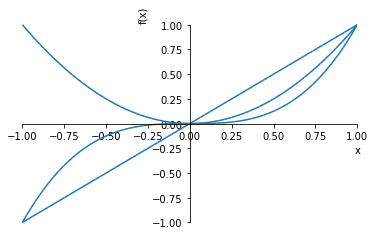

In [29]:
expr_1 = x
expr_2 = x**2
expr_3 = x**3

plot(expr_1, expr_2, expr_3, (x, -1, 1));

### 不同取值范围的多个绘图

采用下面的语法
```
plot(
    (expr_1,range_1),
    (expr_2,range_2),
    ...
)
```

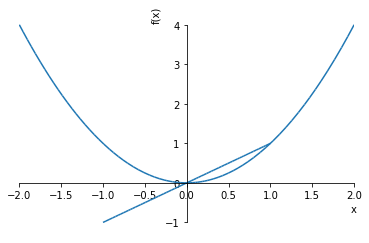

In [30]:
expr_1 = x**2
range_1 = (x,-2,2)

expr_2 = x
range_2 = (x,-1,1)

plot(
    (expr_1,range_1),
    (expr_2,range_2)
);

### 不同颜色的多个绘图

要用不同颜色画绘制多图没有很直接的方法。

1. 传入```show = False```抑制图像的输出, 将返回的绘图object先用一个变量保存。
2. 用数字索引获取绘图变量的每一个数据列，分别设置绘图线的颜色。
3. 调用绘图object的```show()```方法显示图像。

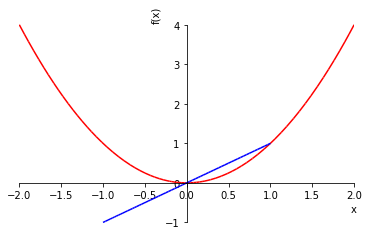

In [31]:
expr_1 = x**2
range_1 = (x,-2,2)

expr_2 = x
range_2 = (x,-1,1)

p = plot(
    (expr_1,range_1),
    (expr_2,range_2),
    show = False
);

p[0].line_color = 'r'
p[1].line_color = 'b'

p.show()

要增加图例的话，需要额外的两个步骤。

1. 构建绘图object时传入```Legend = True```
2. 分别为每个数据系列设置label。

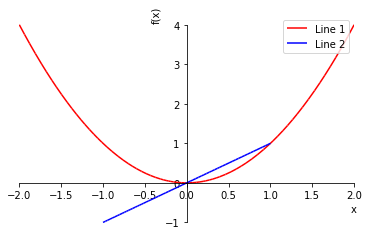

In [32]:
expr_1 = x**2
range_1 = (x,-2,2)

expr_2 = x
range_2 = (x,-1,1)

p = plot(
    (expr_1,range_1),
    (expr_2,range_2),
    show = False,
    legend = True
);

p[0].line_color = 'r'
p[1].line_color = 'b'

p[0].label = 'Line 1'
p[1].label = 'Line 2'

p.show()

## 3D面绘图
### 单平面绘图

用```plot3d(expr, x_range , y_range)```绘制3D面图。

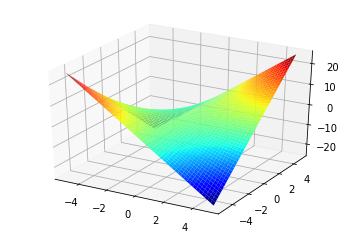

In [33]:
from sympy import symbols
from sympy.plotting import plot3d

x, y = symbols('x y')

expr = x*y
x_range = (x, -5, 5)
y_range = (y, -5, 5)

plot3d(expr, x_range, y_range);

### 多面绘图

用下面的语法绘制多图。

```
plot3d(
    （expr_1, x_range_1 , y_range_1）,
    （expr_2, x_range_2 , y_range_2）
)
```

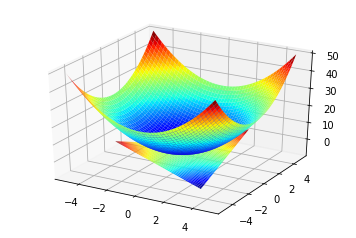

In [34]:
plot3d(
    (x**2 + y**2, (x, -5, 5), (y, -5, 5)),
    (x*y, (x, -3, 3), (y, -3, 3))
);

## 绘制一元参数方程

用```plot_parametric(expr_x, expr_y, range_u)```绘制一元参数方程。

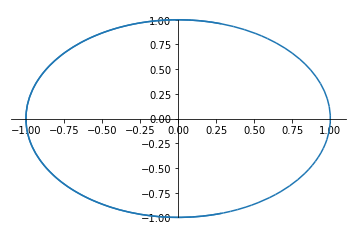

In [35]:
from sympy import symbols, cos, sin
from sympy.plotting import plot_parametric

u = symbols('u')
expr_x = cos(u)
expr_y = sin(u)

p = plot_parametric(expr_x, expr_y, (u, -5, 5));

显示结果并不是一个正圆。Sympy提供```aspect_ratio```参数调整宽高比, 但在Sympy1.0中并未生效。 社区已经在处理这个问题，可能下个版本发行时这个问题就能被解决。

## 绘制3D参数方程线

用```plot3d_parametric_line(expr_x, expr_y, expr_z, range_u)``绘制3D参数方程线。

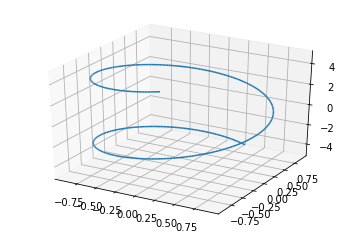

In [36]:
from sympy import symbols, cos, sin
from sympy.plotting import plot3d_parametric_line
u = symbols('u')
expr_x = cos(u)
expr_y = sin(u)
expr_z = u

plot3d_parametric_line(expr_x, expr_y, expr_z, (u, -5, 5));

## 绘制3D参数方程面
用```plot3d_parametric_surface(expr_x, expr_y, expr_z, u_range, v_range)```绘制3D参数方程面。

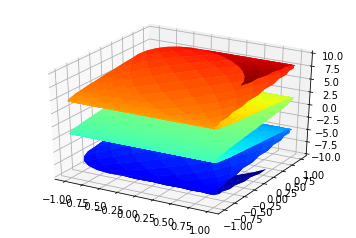

In [37]:
from sympy import symbols, cos, sin
from sympy.plotting import plot3d_parametric_surface
u, v = symbols('u v')

expr_x = cos(u + v)
expr_y = sin(u-v)
expr_z = u-v
u_range = (u, -5, 5)
v_range = (v, -5, 5)

plot3d_parametric_surface(expr_x, expr_y, expr_z, u_range, v_range);

## 隐函数
### 一元隐函数
用lot_implicit(equition)```绘制一元隐函数。

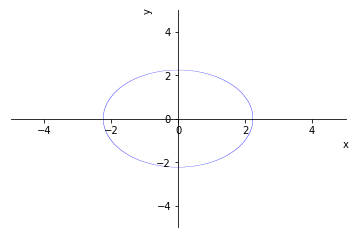

In [38]:
p1 = plot_implicit(Eq(x**2 + y**2-5))

### 多元隐函数

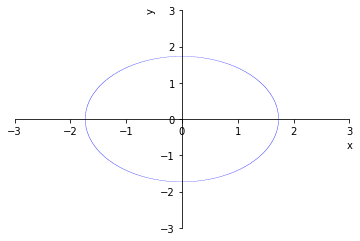

In [39]:
p2 = plot_implicit(
    Eq(x**2 + y**2, 3),
    (x, -3, 3), 
    (y, -3, 3)
)

## 不等式隐式定义的面

给```plot_implicit()```传入不等式即可。

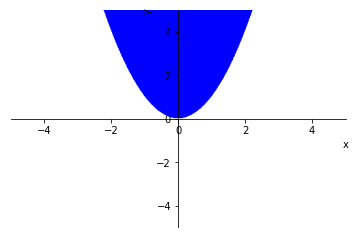

In [40]:
plot_implicit(y > x**2);

如果要用多个条件共同定义区域，使用```And,Or```等逻辑连词。

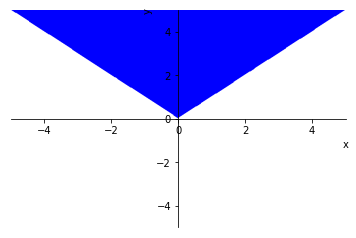

In [41]:
plot_implicit(And(y > x, y > -x));

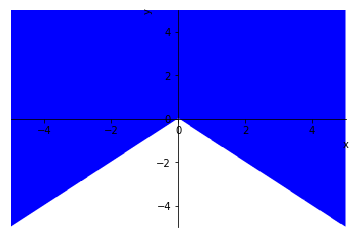

In [42]:
plot_implicit(Or(y > x, y > -x));

有时候Sympy没能挑选你想要的变量作为横轴。

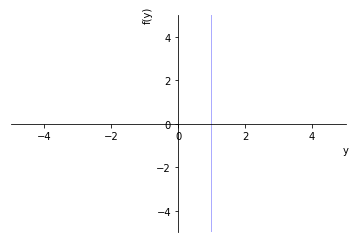

In [43]:
plot_implicit(Eq(y - 1));

这时可以通过```x_var```指定横轴需要的变量。

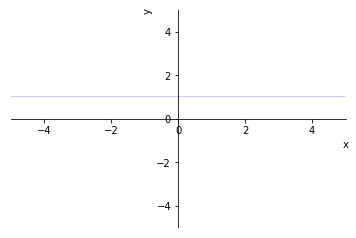

In [44]:
plot_implicit(Eq(y - 1),x_var=x);

# 参考
[Sympy Documentation](http://docs.sympy.org/latest/index.html)

# 相关文章
* [Sympy笔记I]({filename}0026_sympy_intro_1_ch.ipynb)
* [Sympy笔记II]({filename}0027_sympy_intro_2_ch.ipynb)
* [Sympy笔记III]({filename}0028_sympy_intro_3_ch.ipynb)
* [Sympy笔记IV]({filename}0029_sympy_intro_4_ch.ipynb)